<a href="https://colab.research.google.com/github/TenofJiwon/Python/blob/main/ResNet50_L_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CIFAR-10 dataset을 가져옵니다. 그림을 10가지로 분류하는 문제입니다.

from keras.datasets import cifar10 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train.shape     

(50000, 32, 32, 3)

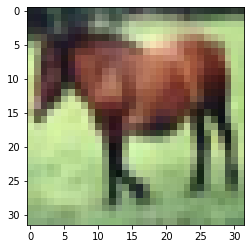

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[7])
plt.show()
     

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trans_model = ResNet50(include_top=False,
                 weights="imagenet",
                 input_shape=(32,32,3),
                 classes=1000) 

In [ ]:
trans_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
trans_model.trainable = False ### 여기 

from tensorflow.keras.layers import Flatten, Dropout

model= Sequential()
model.add(trans_model)
model.add(Flatten())
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='selu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 30)                61470     
                                                                 
 dense_25 (Dense)            (None, 15)                465       
                                                                 
 dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 dense_26 (Dense)            (None, 10)                160       
                                                                 
Total params: 23,649,807
Trainable params: 62,095
Non-

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=250, verbose=1)

Epoch 1/4
200/200 [==============================] - 123s 601ms/step - loss: 2.2876 - accuracy: 0.1513
Epoch 2/4
200/200 [==============================] - 116s 578ms/step - loss: 2.1030 - accuracy: 0.2116
Epoch 3/4
200/200 [==============================] - 116s 580ms/step - loss: 2.0099 - accuracy: 0.2434
Epoch 4/4
200/200 [==============================] - 116s 580ms/step - loss: 1.9555 - accuracy: 0.2717
